In [51]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Для работы использован датасет harry-potter-dataset ссылка: https://www.kaggle.com/datasets/adnananam/harry-potter-dataset

In [53]:
harry_potter = pd.read_csv("/content/drive/MyDrive/Harry_Potter_Scraped_Dataset.csv")

In [54]:
harry_potter

,Book Name,Copies Sold in UK,Copies Sold WorldWide,Publish Date,Publish Month,Publish Year,Pages,Words,Audiobook,Total Awards Won
0,Harry Potter and the Sorcerer’s Stone,4.2,120,26,June,1997,223,"76,944",9 hrs and 33 mins,8
1,Harry Potter and the Chamber of Secrets,3.5,77,2,July,1998,251,"85,141",11 hrs and 5 mins,5
2,Harry Potter and the Prisoner of Azkaban,3.4,65,8,July,1999,317,"107,253",13 hrs and 10 mins,3
3,Harry Potter and the Goblet of Fire,3.6,65,8,July,2000,636,"190,637",22 hrs and 17 mins,1
4,Harry Potter and the Order of the Phoenix,4.2,65,21,June,2003,766,"257,045",30 hrs and 18 mins,1
5,Harry Potter and the Half-blood Prince,4.1,65,16,July,2005,607,"168,923",21 hrs and 27 mins,1
6,Harry Potter and the Deathly Hallows,4.5,65,21,July,2007,607,"198,227",24 hrs,0


In [55]:
harry_potter.info

<bound method DataFrame.info of                                    Book Name  Copies Sold in UK  \
0      Harry Potter and the Sorcerer’s Stone                4.2   
1    Harry Potter and the Chamber of Secrets                3.5   
2   Harry Potter and the Prisoner of Azkaban                3.4   
3        Harry Potter and the Goblet of Fire                3.6   
4  Harry Potter and the Order of the Phoenix                4.2   
5     Harry Potter and the Half-blood Prince                4.1   
6       Harry Potter and the Deathly Hallows                4.5   

   Copies Sold WorldWide  Publish Date Publish Month  Publish Year  Pages  \
0                    120            26          June          1997    223   
1                     77             2          July          1998    251   
2                     65             8          July          1999    317   
3                     65             8          July          2000    636   
4                     65            21        

In [56]:
#Чтобы было проще ориентироваться, я просто пронумерую книги. И да, первая и вторая части Седьмой книги объединены.
harry_potter['Book Name'] = ['Harry Potter 1', 'Harry Potter 2', 'Harry Potter 3', 'Harry Potter 4', 'Harry Potter 5', 'Harry Potter 6', 'Harry Potter 7']

In [57]:
harry_potter

,Book Name,Copies Sold in UK,Copies Sold WorldWide,Publish Date,Publish Month,Publish Year,Pages,Words,Audiobook,Total Awards Won
0,Harry Potter 1,4.2,120,26,June,1997,223,"76,944",9 hrs and 33 mins,8
1,Harry Potter 2,3.5,77,2,July,1998,251,"85,141",11 hrs and 5 mins,5
2,Harry Potter 3,3.4,65,8,July,1999,317,"107,253",13 hrs and 10 mins,3
3,Harry Potter 4,3.6,65,8,July,2000,636,"190,637",22 hrs and 17 mins,1
4,Harry Potter 5,4.2,65,21,June,2003,766,"257,045",30 hrs and 18 mins,1
5,Harry Potter 6,4.1,65,16,July,2005,607,"168,923",21 hrs and 27 mins,1
6,Harry Potter 7,4.5,65,21,July,2007,607,"198,227",24 hrs,0


In [58]:
print(harry_potter.columns.tolist())

['Book Name', 'Copies Sold in UK', 'Copies Sold WorldWide', 'Publish Date', 'Publish Month', 'Publish Year', 'Pages', 'Words', 'Audiobook', 'Total Awards Won']


In [59]:
book_name = harry_potter['Book Name'].tolist()
sold_in_uk = harry_potter['Copies Sold in UK'].tolist()
print(sold_in_uk)

[4.2, 3.5, 3.4, 3.6, 4.2, 4.1, 4.5]


## Неправильные графики

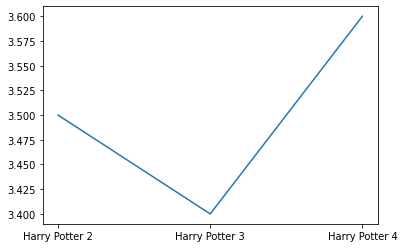

In [60]:
# На графике виден существенный спад продаж, хотя фактически колебание (снижение с 3,5 млн до 3,4 млн и рост до 3,6 млн) составило менее 6%
x_1 = [book_name[1], book_name[2], book_name[3]]
y_1 = [sold_in_uk[1], sold_in_uk[2], sold_in_uk[3]]

plt.plot(x_1, y_1)
plt.show()

Text(0, 0.5, 'Количество страниц')

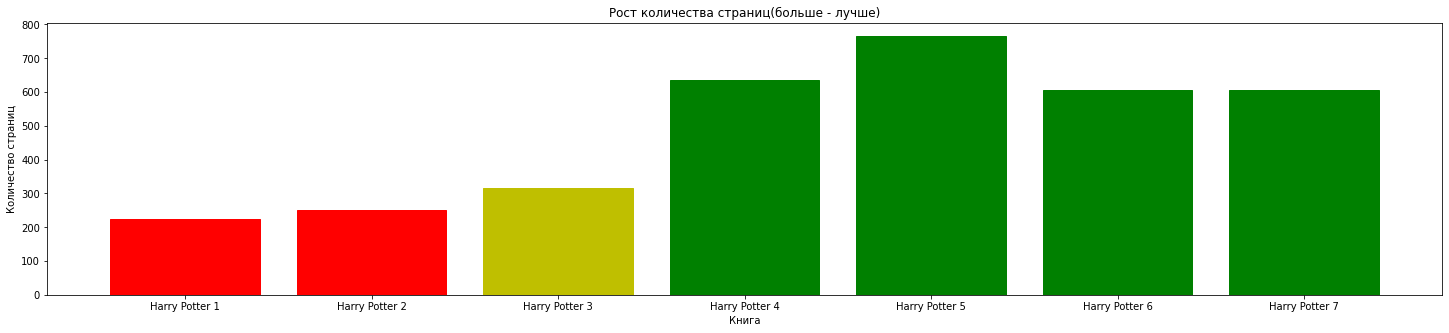

In [61]:
#Неверная метрика: Выдать второстепенную метрику (в данном случае увеличение количества страниц) за первостепенную метрику, оказывающую критическое воздейсвие на качество продукта
pages = harry_potter['Pages'].tolist()
fig, ax = plt.subplots(figsize=(25,5))
barlist = plt.bar(book_name, pages)

barlist[0].set_color('r')
barlist[1].set_color('r')
barlist[2].set_color('y')
barlist[3].set_color('g')
barlist[4].set_color('g')
barlist[5].set_color('g')
barlist[6].set_color('g')

plt.title("Рост количества страниц(больше - лучше)")
plt.xlabel("Книга")
plt.ylabel("Количество страниц")

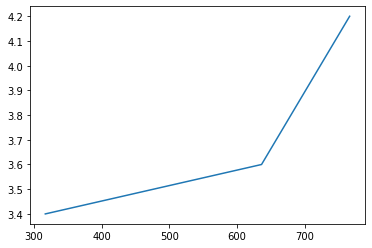

In [62]:
# Ложные зависимости: Продемонстрировать несуществующую зависимость роста целевого показателя от в второстепенного показателя

# Можно продемонстрировать зависимость увеличения числа продаж в Великобритании от увеличения количества страниц 
x_3 = [pages[2], pages[3], pages[4]]
y_3 = [sold_in_uk[2], sold_in_uk[3], sold_in_uk[4]]

plt.plot(x_3, y_3)
plt.show()

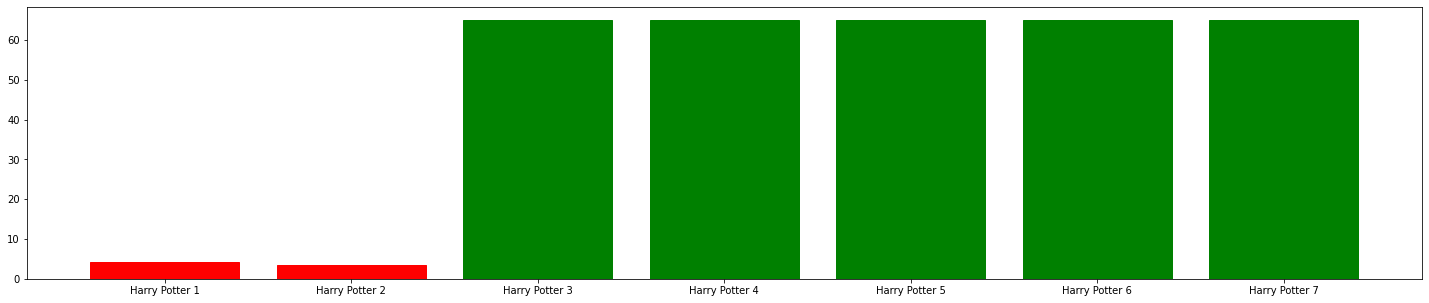

In [63]:
# Сравнивать объекты по несвязанным показателям: Продажи по первым двум книгам указаны только в Великобритания, а для остальных во всё мире(при этом продажи в мире первых двух больше) 
sold_in_world = harry_potter['Copies Sold WorldWide'].tolist()

x_4 = [sold_in_uk[0], sold_in_uk[1], sold_in_world[2], sold_in_world[3], sold_in_world[4], sold_in_world[5], sold_in_world[6]]

fig, ax = plt.subplots(figsize=(25,5))
barlist = plt.bar(book_name, x_4)

barlist[0].set_color('r')
barlist[1].set_color('r')
barlist[2].set_color('g')
barlist[3].set_color('g')
barlist[4].set_color('g')
barlist[5].set_color('g')
barlist[6].set_color('g')

## Правильные графики

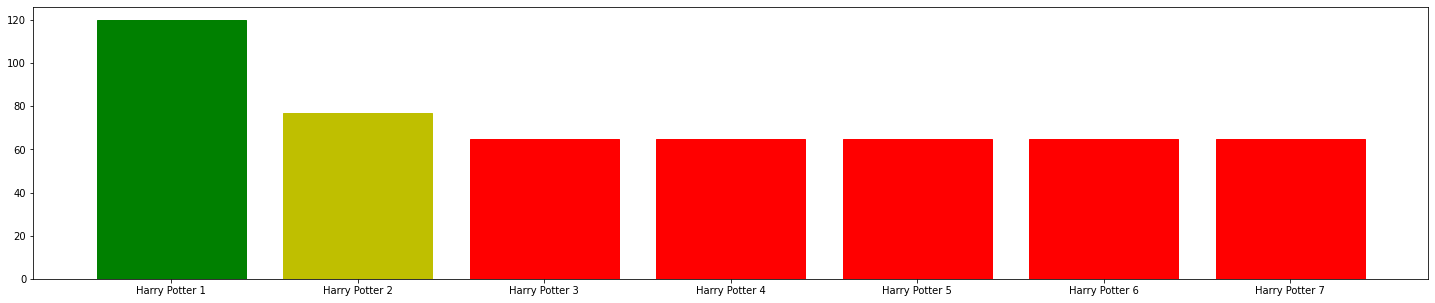

In [64]:
# Честное сравнение продаж разных частей серии

fig, ax = plt.subplots(figsize=(25,5))
barlist = plt.bar(book_name, sold_in_world)

barlist[0].set_color('g')
barlist[1].set_color('y')
barlist[2].set_color('r')
barlist[3].set_color('r')
barlist[4].set_color('r')
barlist[5].set_color('r')
barlist[6].set_color('r')

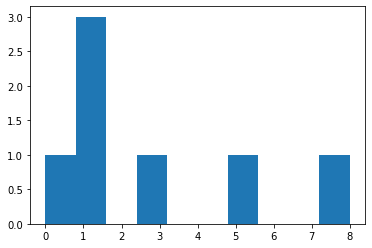

In [65]:
# Количество премий для каждой части
total_awards = harry_potter['Total Awards Won'].tolist()
x_6 = total_awards

plt.hist(x_6)
plt.show()

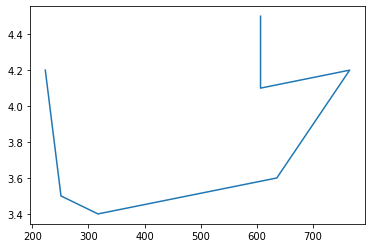

In [66]:
# Влияние количества страниц на продажи (тут используются все книги, а не только те, что подтверждают гипотезу)
publish_year = harry_potter['Publish Year'].tolist()
plt.plot(pages, sold_in_uk)
plt.show()

#Как видно из графика, количество страниц на продажи не влияет

[120, 197, 262, 327, 392, 457, 522]


<function matplotlib.pyplot.show(*args, **kw)>

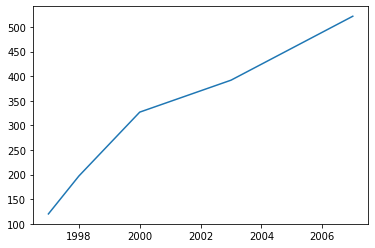

In [67]:
# Рост общего числа изданных книг по годам
total_sold = []
ts = 0

year = harry_potter['Publish Year'].tolist()
yc = len(year)

for i in range(yc):
  ts = ts + sold_in_world[i]
  total_sold.append(ts)

print(total_sold)

plt.plot(year, total_sold)
plt.show